In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

energy_df = pd.read_csv('/energydata_complete.csv')
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


<Axes: xlabel='T2', ylabel='T6'>

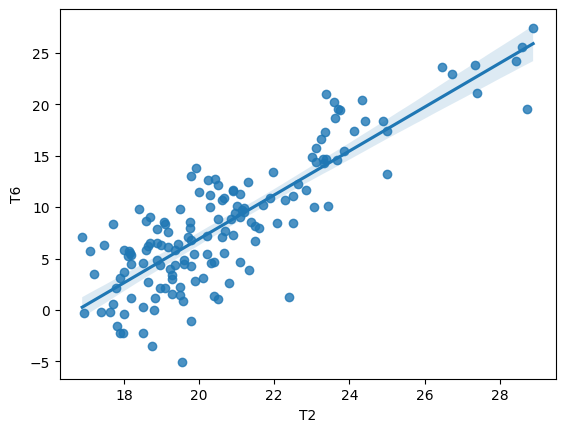

In [ ]:
#select a sample of the dataset
simple_linear_reg_energy_df = energy_df[['T2', 'T6']].sample(150, random_state=37)
#regression plot
sns.regplot(x="T2", y="T6",
            data=simple_linear_reg_energy_df)

## Question 17
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P?

In [ ]:
T2_T6_energy_df = energy_df[['T2', 'T6']]
features_df = T2_T6_energy_df.drop(columns=['T6'])
T6_target = T2_T6_energy_df['T6']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, T6_target, test_size=0.3, random_state=37)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
rmse_3dp = round(rmse, 3)
print(rmse_3dp)


3.611


## General Instructions

Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and transform methods on the train and test set respectively). Run a multiple linear regression using the training set. Answer the following questions:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_df = energy_df.drop(columns=['date','lights', 'Appliances'])
Appliances_target = energy_df['Appliances']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, Appliances_target, test_size=0.3, random_state=42)

# normalised_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# normalised_y_train = pd.DataFrame(scaler.fit_transform(y_train), columns=y_train.columns)
# normalised_x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
# normalised_y_test= pd.DataFrame(scaler.transform(y_test), columns=y_test.columns)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

### Question 18
What is the Mean Absolute Error (in three decimal places) for the  training set?

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
mae_3dp = round(mae, 3)
print(mae_3dp)

53.647


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
rmse_3dp = round(rmse, 3)
print(rmse_3dp)


93.64
